In [30]:
# https://medium.com/coffee-in-a-klein-bottle/deep-learning-with-julia-e7f15ad5080b

In [31]:
# import Pkg; Pkg.add("Flux")

In [32]:
using Plots
using Statistics#Auxiliary functions for generating our data
using Flux

In [33]:

function generate_real_data(n)
    x1 = rand(1,n) .- 0.5
    x2 = (x1 .* x1)*3 .+ randn(1,n)*0.1
    return vcat(x1,x2)
end

function generate_fake_data(n)
    θ  = 2*π*rand(1,n)
    r  = rand(1,n)/3
    x1 = @. r*cos(θ)
    x2 = @. r*sin(θ)+0.5
    return vcat(x1,x2)
end# Creating our data



generate_fake_data (generic function with 1 method)

In [34]:
train_size = 5000
real = generate_real_data(train_size)
fake = generate_fake_data(train_size)# Visualizing

2×5000 Matrix{Float64}:
 0.117419  -0.0416964  0.208681  …  0.000486818  0.0540431  0.134679
 0.364275   0.324309   0.483435     0.498273     0.585476   0.421237

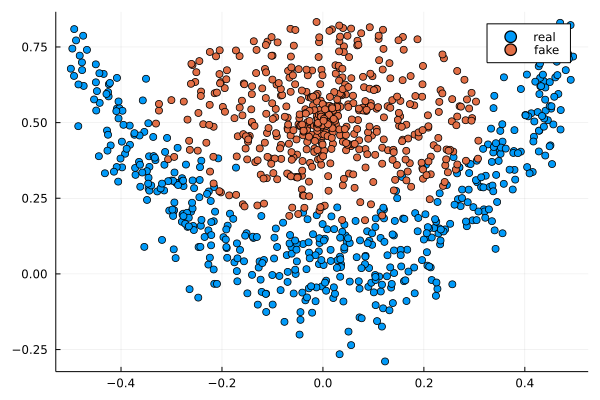

In [35]:

scatter(real[1,1:500],real[2,1:500], label = "real")
scatter!(fake[1,1:500],fake[2,1:500], label = "fake")

In [36]:
function NeuralNetwork()
    return Chain(
            Dense(2, 25,relu),
            Dense(25,1,x->σ.(x))
            )
end

NeuralNetwork (generic function with 1 method)

In [37]:
# Organizing the data in batches
X    = hcat(real,fake)
Y    = vcat(ones(train_size),zeros(train_size))
data = Flux.Data.DataLoader((X, Y'), batchsize=100,shuffle=true);# Defining our model, optimization algorithm and loss function
m    = NeuralNetwork()
opt = Descent(0.05)
loss(x, y) = sum(Flux.Losses.binarycrossentropy(m(x), y))

loss (generic function with 1 method)

In [38]:
size(real), size(fake), size(X)
# s?hcat

((2, 5000), (2, 5000), (2, 10000))

In [44]:
# ?vcat

In [46]:
?Descent

search: Descent ∇depthwiseconv_filter ∇depthwiseconv_filter!



```
Descent(η = 0.1)
```

Classic gradient descent optimiser with learning rate `η`. For each parameter `p` and its gradient `δp`, this runs `p -= η*δp`

# Parameters

  * Learning rate (`η`): Amount by which gradients are discounted before updating                      the weights.

# Examples

```julia
opt = Descent()

opt = Descent(0.3)

ps = params(model)

gs = gradient(ps) do
    loss(x, y)
end

Flux.Optimise.update!(opt, ps, gs)
```


In [39]:
ps = Flux.params(m)
epochs = 20
for i in 1:epochs
    Flux.train!(loss, ps, data, opt)
    println("Epoch $i")
end
println(mean(m(real))," ",mean(m(fake))) # Print model prediction

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
0.8100967684699358 0.18876202382414772


In [40]:
Y'

1×10000 adjoint(::Vector{Float64}) with eltype Float64:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [41]:
m    = NeuralNetwork()
function trainModel!(m,data;epochs=20)
    for epoch = 1:epochs
        for d in data
            gs = gradient(Flux.params(m)) do
                l = loss(d...)
            end
            Flux.update!(opt, Flux.params(m), gs)
        end
        println("Epoch $epoch")
        
    end
    @show mean(m(real)),mean(m(fake))
end
trainModel!(m,data;epochs=20)

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
(mean(m(real)), mean(m(fake))) = (0.8042124362340557, 0.21211074110229697)


(0.8042124362340557, 0.21211074110229697)

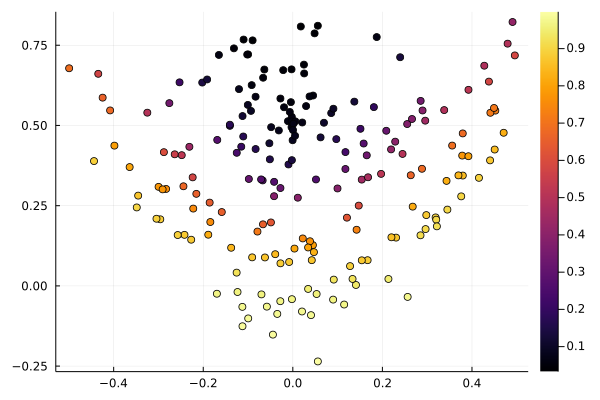

In [42]:
scatter(real[1,1:100],real[2,1:100],zcolor=m(real)')
scatter!(fake[1,1:100],fake[2,1:100],zcolor=m(fake)',legend=false)